## 1. Import the Libraries

In [1]:
# Import Numpy, Pandas, Matplotlib and Seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Data

In [2]:
# Load the Training dataset (read from .csv file and set it to a Pandas DataFrame)
titanic_train = pd.read_csv('Titanic_train.csv')

In [3]:
# Load the Testing dataset (read from .csv file and set it to a Pandas DataFrame)
titanic_test = pd.read_csv('Titanic_test.csv')

## 3. Exploratory Data Analysis

- Study the dataset and describe the columns to understand the data
- Aim is to gain intuition about the data, good understanding of the dataset, some notes for Data Cleaning, and possibly some ideas for Feature Engineering

### 3.1 Check out the Data

#### Insights we could draw from the data:
1. To get to know the data
2. Answer a set of basic questions about the dataset:	
    - How many observations do we have?
	- How many features?
        - Which features are available in the dataset?
	- What are the data types of the features?
        - Which features are numerical?
        - Which features are categorical?
        - Which features are mixed data types?
	- Do we have a target variable (label)?
    - What is the distribution of numerical feature values across the samples?

In [4]:
# Display the few top rows of a DataFrame
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Shape of the Training dataset
titanic_train.shape

(891, 12)

In [6]:
# List of the column names
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Shape of the Testing dataset
titanic_test.shape

(418, 11)

In [8]:
# List of the column names
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# List of all numerical columns
titanic_train.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
# List of all non-numerical columns
titanic_train.select_dtypes(exclude='number').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [11]:
# Data type of each column in a DataFrame
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# Find out how many entries (rows and columns) there are, what type of objects are in the DataFrame (to observe if they have the correct type) etc.
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Summarize the data to see the distribution of data (Statistical information of numerical columns)
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Summarize the data to see the distribution of data (Statistical information of non-numerical columns)
titanic_train.describe(exclude='number')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Reuchlin, Jonkheer. John George",male,347082,G6,S
freq,1,577,7,4,644


#### Conclusion:
- The Testing dataset contains 418 rows and 11 columns
- The Training dataset contains 891 rows and 12 columns
    - **Number of observations**: 891 (or 40% of the actual number of passengers on board the Titanic (2,224))
    - **Number of attributes**: 11 predictor variables and 1 target variable
        - **Predictor variables (features)** are: 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
        - **Target variable (label)** is: 'Survived'
- Types of the data contained within columns are float64 (2 columns), int64 (5 columns) and object (5 columns)
    - **Numerical variables (features)** are 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'
    - **Non-numerical variables (features)** are 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'
- Data variables types:
    - **Numerical**
        - Continous: 'Age', 'Fare'
        - Discrete: 'SibSp', 'Parch'
    - **Categorical**      
        - Nominal: 'Survived', 'Sex', 'Embarked'
        - Ordinal: 'Pclass'
- 'Ticket' column is a mix of numeric and alphanumeric data types and 'Cabin' column is alphanumeric
- 'Ticket' feature has high ratio (24%) of duplicate values (unique = 681, count = 891)
- Names are unique across the dataset (count = unique = 891)
- 'Sex' column has two possible values with 65% male (top = male, freq = 577/count = 891)
- 'Cabin' values have several dupicates across observations (count = 204, unique = 147) (alternatively several passengers shared a cabin)
- 'Embarked' feature takes three possible values and S port is used by most passengers (top = S)
- 'Age' and 'Embarked' columns have only few missing values, whereas 'Cabin' column has so many missing values
- So far, there are no feature(s) that is/are of no significance and cannot provide any insight into the dataset

In [15]:
# Generate descriptive statistics of the column
titanic_train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [16]:
# Check the number of unique values in the column
titanic_train['Survived'].nunique()

2

In [17]:
# Check the unique values and counts of unique values
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# Status counts as percentages
titanic_train['Survived'].value_counts(normalize=True, dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Conclusion:
- Target variable (label) is 'Survived' column, it has 2 unique values (binary format) (class 0 and class 1) and its data type is int64
- The target variable (label) is categorical, which means that predicting of the target variable (label) is a **Classification problem**
- **Class distribution** (Number of observations (rows) that belong to each class (category)):
    - class 0: 549 (62%)
    - class 1: 342 (38%)
- Each class does not have a same number of observations (62% vs. 38%) (imbalanced class distribution)

### 3.2 Data Visualizations

- Overall goal is **to visualize the data** and to get understanding of **which features are important** for analysis 
- **Types of plots for visualization**:
    - **Univariate plots**
        - plots of each **individual feature**
        - to better **understand each feature**
        - use Count plot, Bar plot, Histogram, Dist plot, Box plot, Whisker plot etc.
    - **Multivariate plots**
        - plots of several **(multi) features**
        - to better **understand the relationships between features**
        - Scatter plot, Heatmap, Pair plot, Bar plot etc.
- In order to select the appropriate plots for visualization, first **understand the Data Variables type (Numerical or Categorical)**:
    - Plot Categorical Distributions
    - Plot Numerical Distributions
    - Plot Correlations
    - Plot Segmentations

#### Insights we could draw from the charts:
**1. Plot Categorical Distributions**
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

**2. Plot Numerical Distributions**
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

**3. Plot Correlations**
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?
   
**4. Plot Segmentations**
   - Use Box plot
   - Observe the relationships between categorical features and label (Distribution of label per categorical feature)
   - Observe the relationships between categorical features and numeric features (Distribution of numeric feature per categorical feature)
   - Median (middle vertical bar in the box)									
   - Min and Max

In [19]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

#### 3.2.1 Plot Categorical Distributions

- Few things to look out for and insights we could draw from the charts:
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

### 1. `Survived` feature

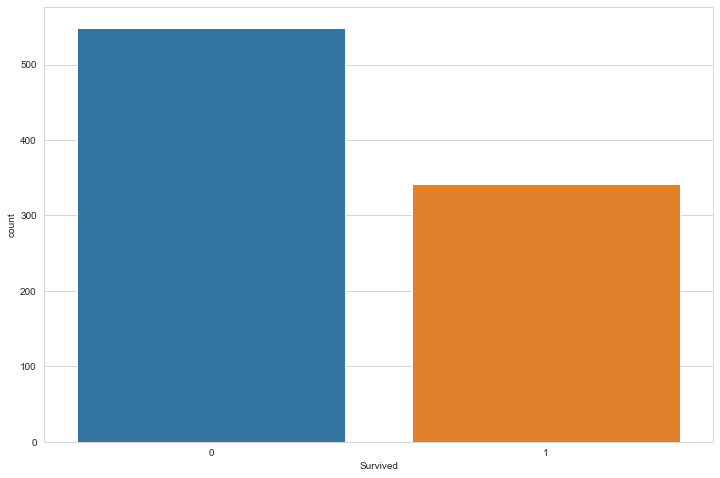

In [20]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin
sns.countplot(x='Survived', data=titanic_train)

In [21]:
# Check the unique values and counts of unique values
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
# Status counts as percentages
titanic_train['Survived'].value_counts(normalize=True, dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Conclusion:
- About 62% of the passangers died (549) and 38% have managed to survive (342) the accident, so we have relatively balanced classification problem:
    - class 0: 549 (62%)
    - class 1: 342 (38%)
- Minority of passengers survived (class 1) than passangers who didn't survive (class 0)

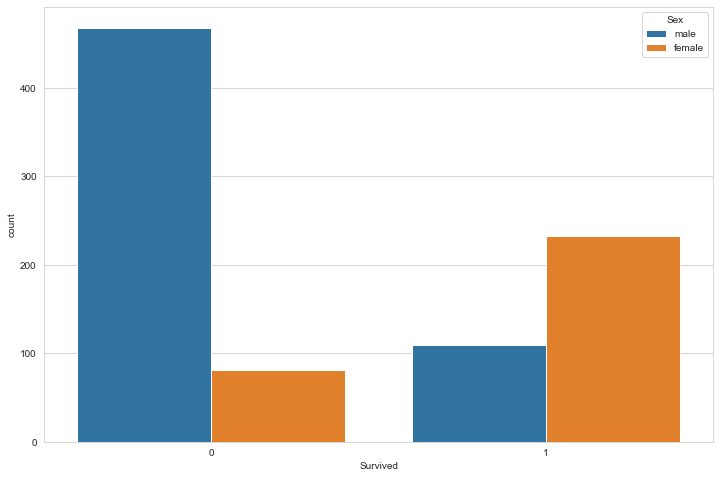

In [23]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin per categorical data ('Sex')
sns.countplot(x='Survived', data=titanic_train, hue='Sex')

In [24]:
# Number of people survived and deceased according to Sex (Male)
titanic_train["Survived"][titanic_train["Sex"] == 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [25]:
# Number of people survived and deceased according to Sex (Female)
titanic_train["Survived"][titanic_train["Sex"] == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [26]:
# Percentage of people survived according to Sex (Male and Female)
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Conclusion:
- Deceased (class 0) passangers:
    - Male = 468
    - Female = 81
- Survived (class 1) passangers:
    - Male = 109
    - Female = 233
- 'Sex' female passengers have very high survival rate at 74%, which indicates that they have high priority of survival

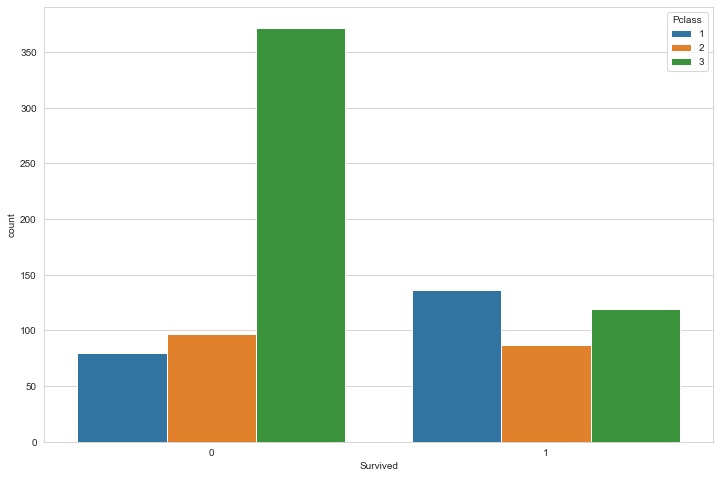

In [27]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin per categorical data ('Pclass')
sns.countplot(x='Survived', data=titanic_train, hue='Pclass')

In [28]:
# Number of people survived and deceased according to Ticket class (Pclass 1)
titanic_train["Survived"][titanic_train["Pclass"] == 1].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [29]:
# Number of people survived and deceased according to Ticket class (Pclass 2)
titanic_train["Survived"][titanic_train["Pclass"] == 2].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [30]:
# Number of people survived and deceased according to Ticket class (Pclass 3)
titanic_train["Survived"][titanic_train["Pclass"] == 3].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [31]:
# Percentage of people survived according to Ticket class
titanic_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Conclusion:
- Deceased (class 0) passangers:
    - Pclass 1 = 89
    - Pclass 2 = 97
    - Pclass 3 = 372
- Survived (class 1) passangers:
    - Pclass 1 = 136
    - Pclass 2 = 87
    - Pclass 3 = 119
- 'Pclass' first class passengers have high survival rate > 60%, which indicates that they have high priority of survival
- Significant correlation > 0.6 among 'Pclass' = 1 and 'Survived'

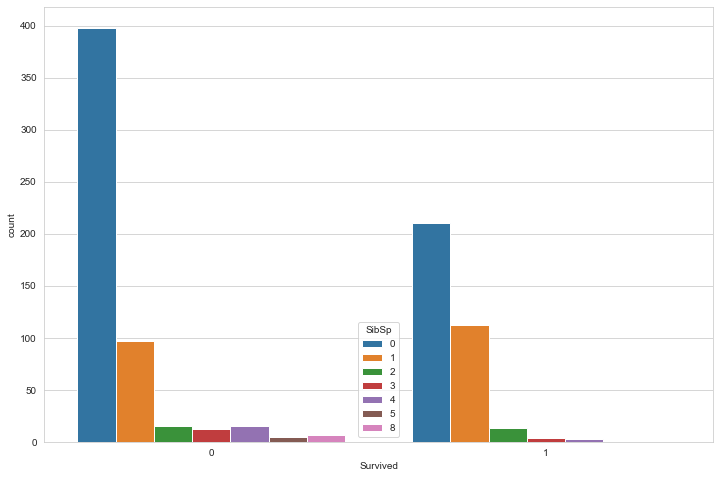

In [32]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin per categorical data ('SibSp')
sns.countplot(x='Survived', data=titanic_train, hue='SibSp')

In [33]:
# Percentage of people survived according to number of siblings or spouses travelling with each passenger
titanic_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### Conclusion:
- 'SibSp' feature have zero correlation for certain values (5 and 8)

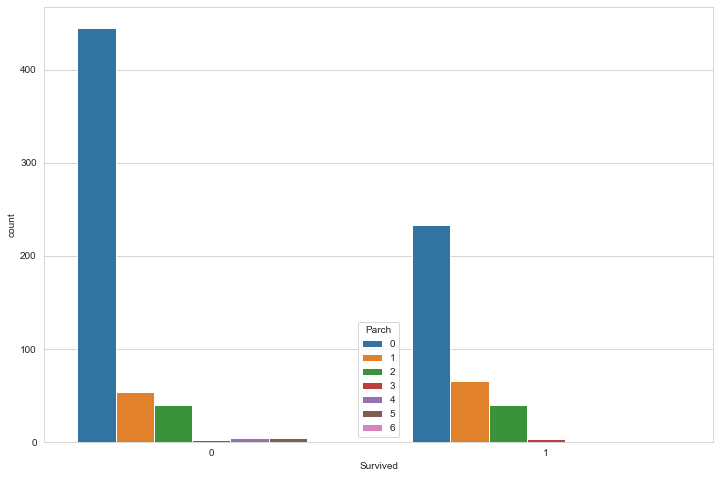

In [34]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin per categorical data ('SibSp')
sns.countplot(x='Survived', data=titanic_train, hue='Parch')

In [35]:
# Percentage of people survived according to number of parents of children travelling with each passenger
titanic_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Conclusion:
- 'Parch' feature have zero correlation for certain values (4 and 6)

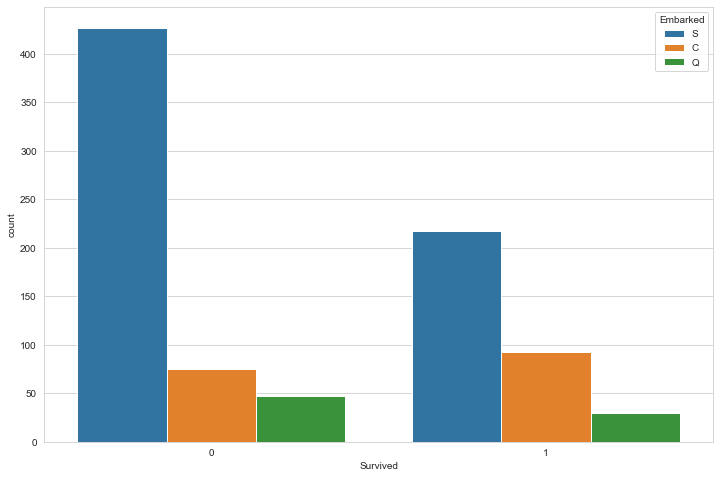

In [36]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin per categorical data ('SibSp')
sns.countplot(x='Survived', data=titanic_train, hue='Embarked')

In [37]:
# Percentage of people survived according to port from where the passenger was embarked/boarded
titanic_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


#### Conclusion:
- Most of the passangers were embarked from S port, but most of passangers who survived the accident were embarked from C port

#### 3.2.2 Plot Numerical Distributions

- Few things to look out for and insights we could draw from the charts:
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

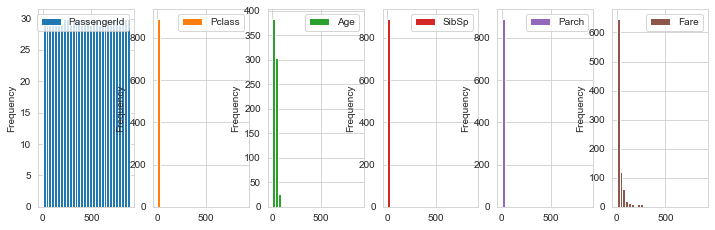

In [38]:
# Display (plot) and explore the distribution of a continious (numeric) feature
titanic_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].plot(kind='hist', subplots=True, layout=(2,6), figsize=(12,8), bins=30)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 864x576 with 0 Axes>

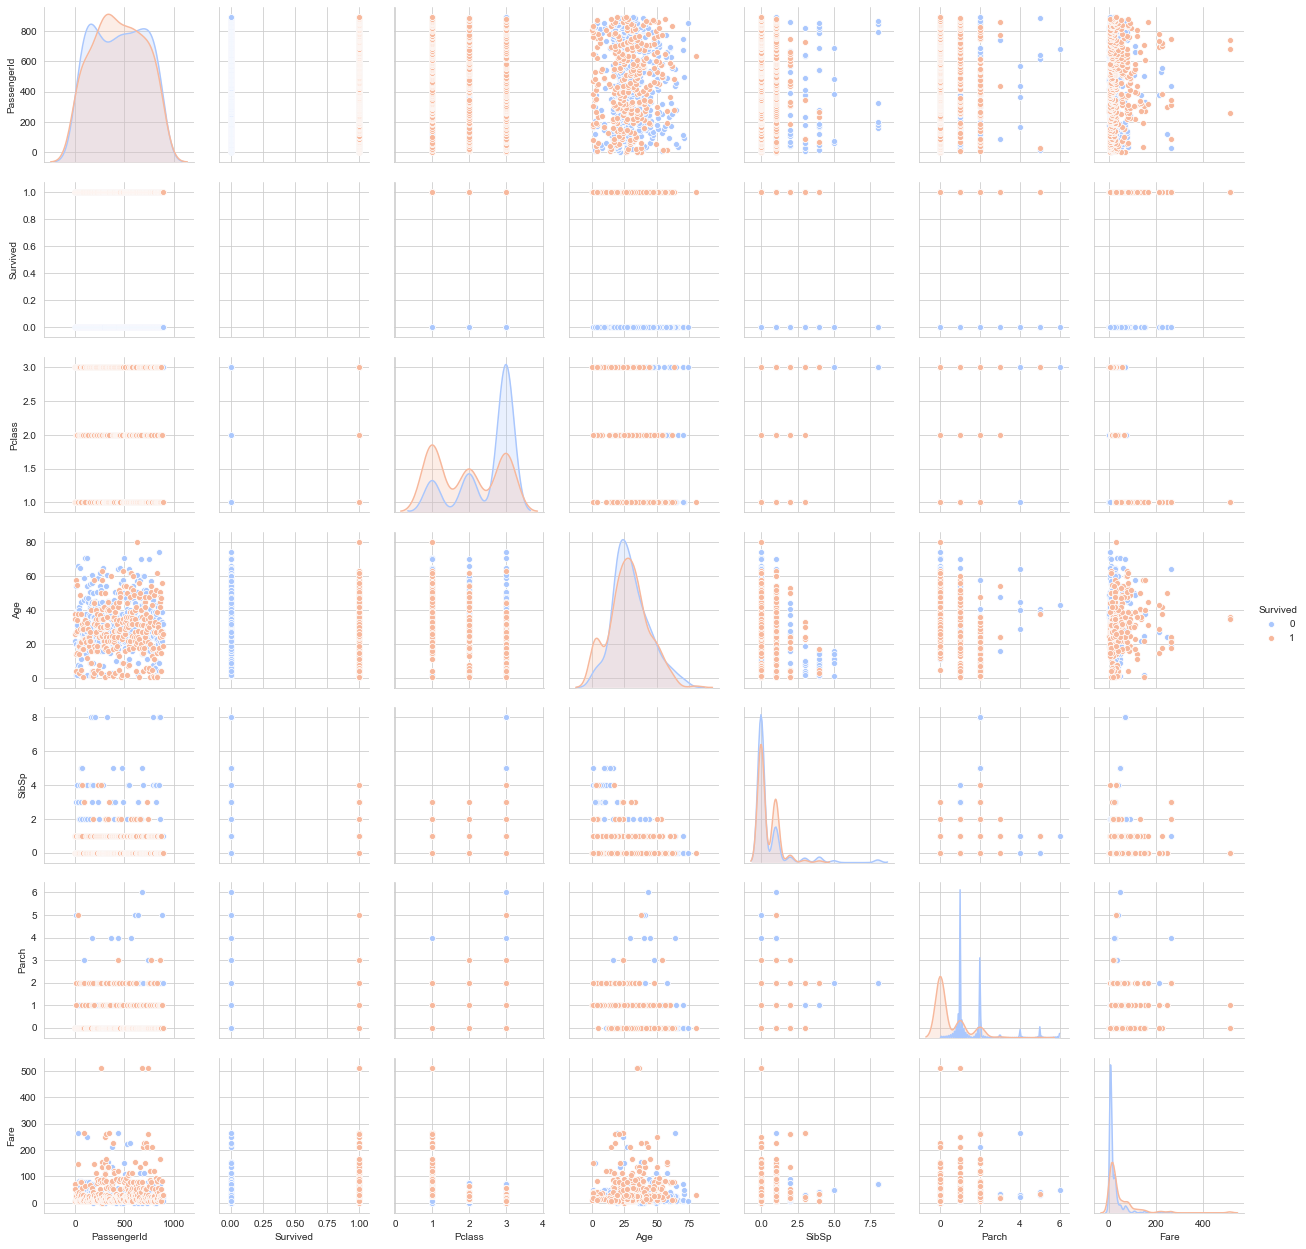

In [39]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of and the correlation between all numerical features
sns.pairplot(data=titanic_train, hue='Survived', palette='coolwarm')

### 1. `Age` feature

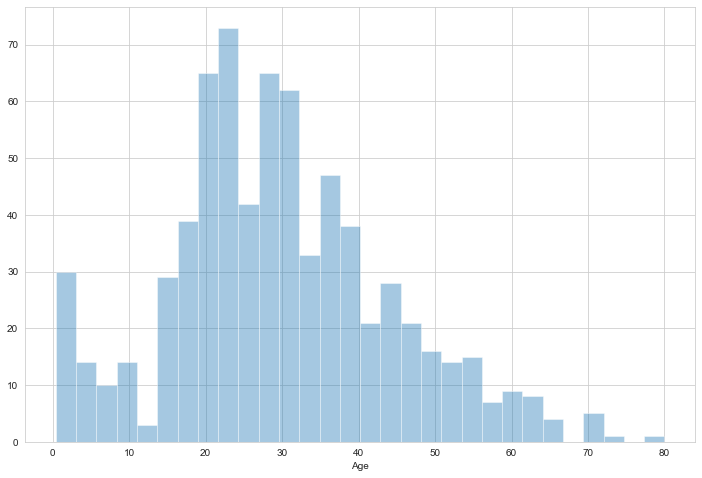

In [40]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(titanic_train['Age'].dropna(), kde=False, bins=30)

In [41]:
# Compute the arithmetic mean (average) value
titanic_train['Age'].mean()

29.69911764705882

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


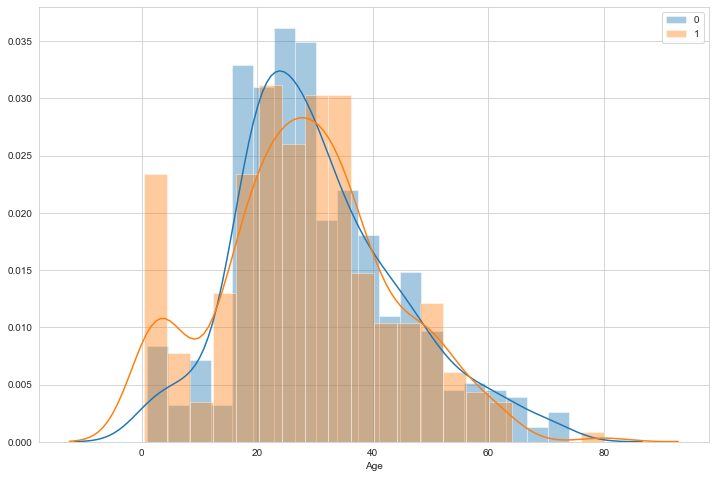

In [42]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of continious (numeric) features by class of categorical data (target variable (label))
for i in titanic_train['Survived'].unique():
    sns.distplot(titanic_train['Age'][titanic_train['Survived']==i], kde=True, label='{}'.format(i), bins=20)

plt.legend()

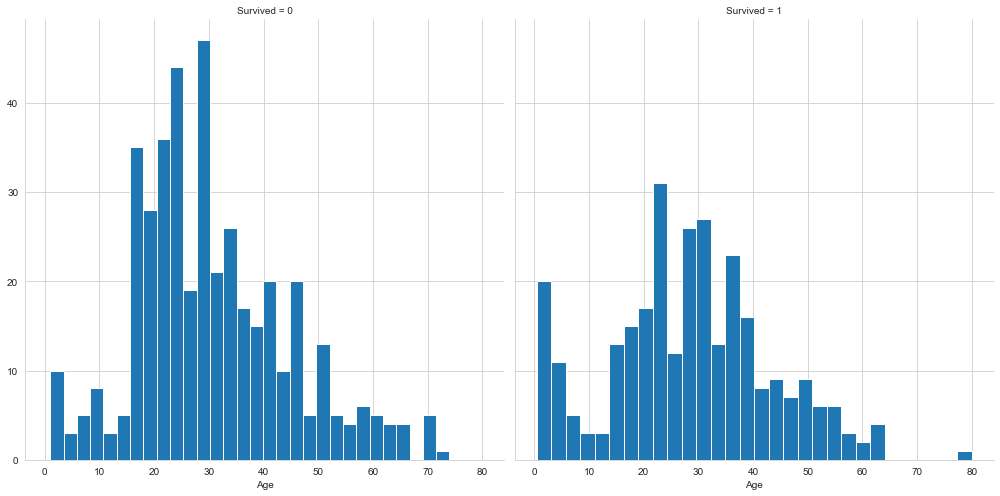

In [43]:
# Display (plot) and explore the conditional relationships between continious (numeric) features
# Initialize a 1x2 grid of facets
g = sns.FacetGrid(titanic_train, col='Survived', height=7)

# Draw a univariate plot on each facet
g.map(plt.hist, 'Age', bins=30)

#### Conclusion:
- Most passengers are in 15-40 age range
- Large number of 15-25 year olds did not survive the accident
- Passangers with Age < 5 have high survival rate

### 2. `Fare` feature

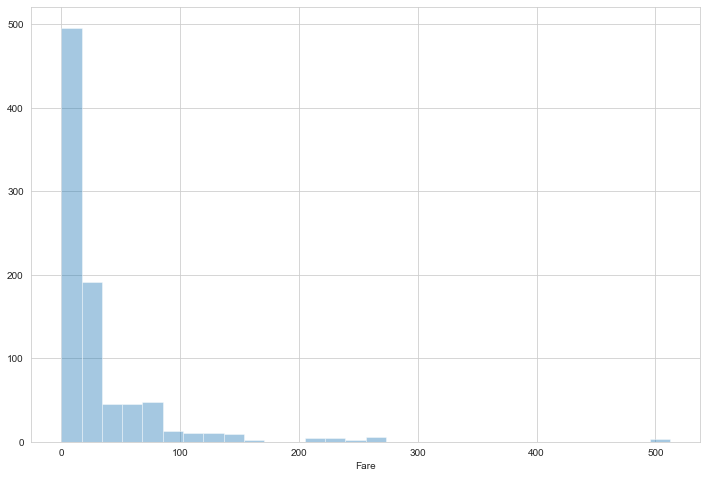

In [44]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(titanic_train['Fare'].dropna(), kde=False, bins=30)

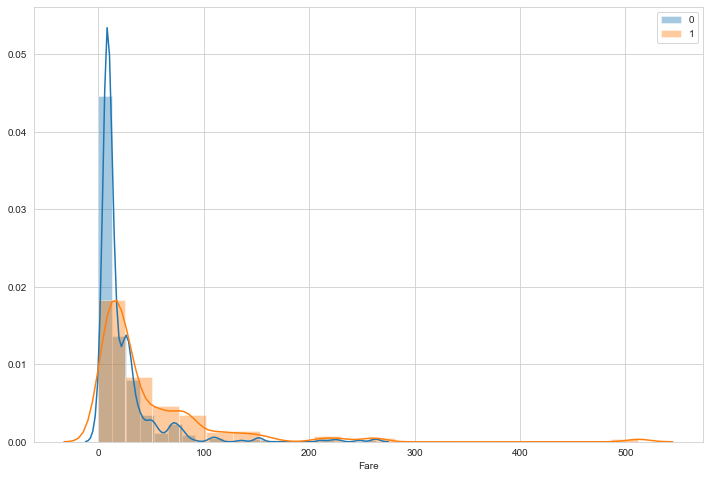

In [45]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of continious (numeric) features by class of categorical data (target variable (label))
for i in titanic_train['Survived'].unique():
    sns.distplot(titanic_train['Fare'][titanic_train['Survived']==i], kde=True, label='{}'.format(i), bins=20)

plt.legend()

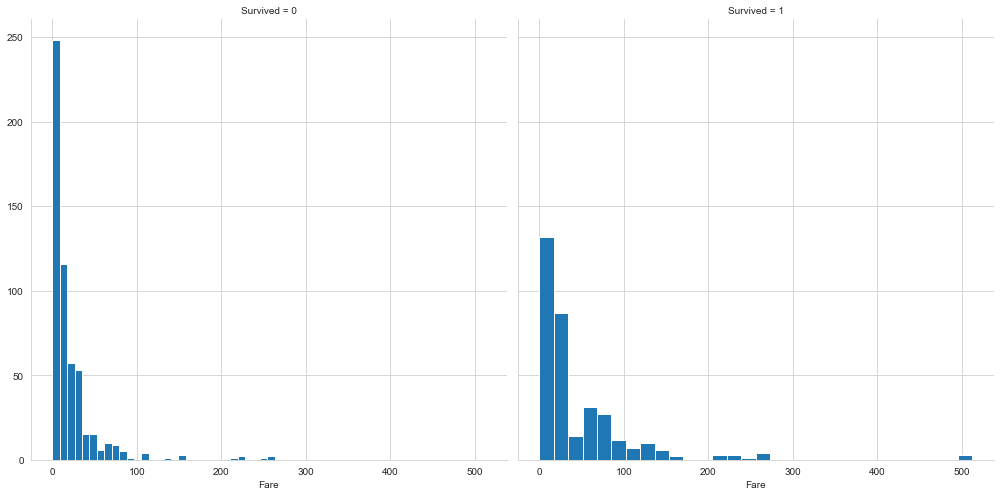

In [46]:
# Display (plot) and explore the conditional relationships between continious (numeric) features
# Initialize a 1x2 grid of facets
g = sns.FacetGrid(titanic_train, col='Survived', height=7)

# Draw a univariate plot on each facet
g.map(plt.hist, 'Fare', bins=30)

#### Conclusion:
- Passangers who paid the cheapest tickets for the travel journey have lower survival rate

In [47]:
# Import Cufflinks library
import cufflinks as cf

# Use Cufflinks offine
cf.go_offline()

In [48]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
titanic_train['Fare'].iplot(kind='hist', bins=30)

<Figure size 864x576 with 0 Axes>

#### 3.2.3 Plot Correlations

- Few things to look out for and insights we could draw from the charts:
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?

In [49]:
# Display data correlation (correlations between all numerical feature variables)
titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(7, 0)

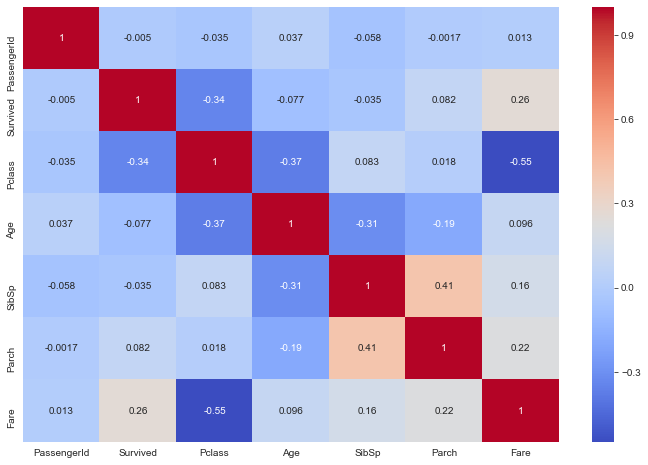

In [50]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore correlations between all numerical feature variables through visualization
ax = sns.heatmap(data=titanic_train.corr(), annot=True, cmap='coolwarm')
plt.ylim(7,0)

#### Conclusion:
- Resulting correlation table and Heatmap show the correlation score between all numerical feature variables
- Moderately positive correlation between:
    - 'SibSp' and 'Parch' (0.41)
    - 'Fare' and 'Survived' (0.26)
- Highly negative correlated values between:
    - 'Pclass' and 'Fare' (-0.55)
    - 'Pclass' and 'Age' (-0.37)
- There is no feature(s) that is/are perfect predictor(s) of the target variable (label)

## 4. Data Preprocessing and Feature Engineering

#### Data Preprocessing and Feature Engineering by:
- check the relationship of the columns (features) with the target variable (label)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- check the missing values by columns (features) and rows (observations)
    - drop the columns (features) and rows (observations) with missing values
    - fill in the missing values in columns (features)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- convert to a Dummy variable feature using One-hot coding
- extracting the Date
- remove erroneous values
- redundant data
- nullify the impact of outliers
- etc.

### 4.1 Identify the variables

Look at the columns of the dataset which can act as:
- Predictor variables (features)
- Target variable (label)

In [51]:
# List of the column names
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Conclusion:
- **Predictor variables (features)** are: 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
- **Target variable (label)** is: 'Survived'

### 4.2 Dealing with Missing values

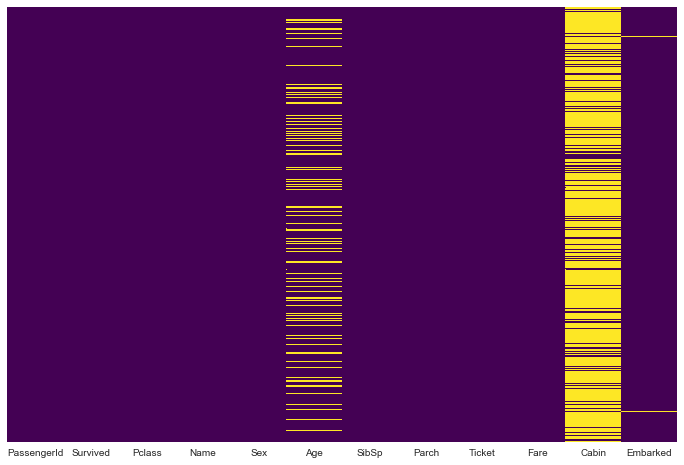

In [52]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) the missing values
sns.heatmap(data=titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [53]:
# Total count of missing (null) values for each column and sort them in ascending order
titanic_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [54]:
# Total count of missing (null) values for each column in % of the total DataFrame and sort them in ascending order
titanic_train.isnull().mean().sort_values(ascending=False)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

#### Conclusion:
- **Missing values per feature**:
    - Cabin = 687 (77.1%)
    - Age = 177 (19.87%)
    - Embarked = 2 (0.22%)

#### 4.2.1 Dealing with Missing values in Columns

**Missing values in Columns:**
1. Age = 177 (19.87%)
2. Cabin = 687 (77.1%)

### 1. `Age` feature

In [55]:
# Check the number of unique values in the column
titanic_train['Age'].nunique()

88

In [56]:
# Check the unique values and counts of unique values
titanic_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

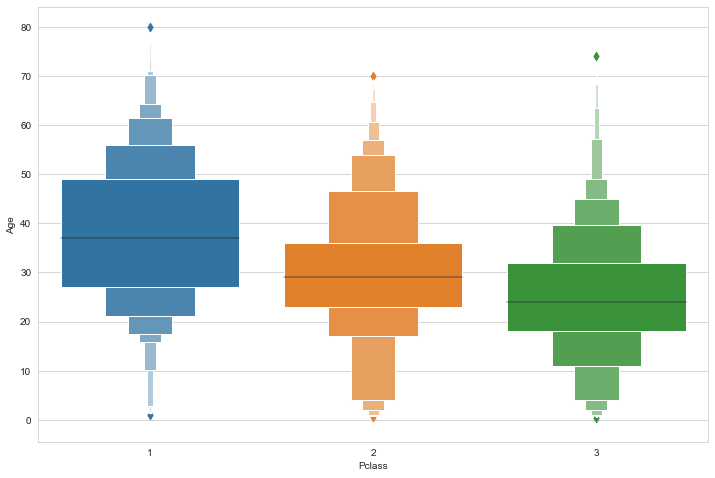

In [57]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data ('Pclass') in each categorical bin for continious (numeric) feature ('Age')
sns.boxenplot(x='Pclass', y='Age', data=titanic_train)

#### Conclusion:
- Roughly 20% of the 'Age' data is missing
- The proportion of 'Age' missing data is likely small enough for reasonable replacement with some form of imputation

In [58]:
# Create function to apply and fill in the missing values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [59]:
# Fill in the missing values in a column with the mean (average) value of the values in other categorical data
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [60]:
# Total count of missing (null) values for each column and sort them in ascending order
titanic_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

### 2. `Cabin` feature

In [61]:
# Check the number of unique values in the column
titanic_train['Cabin'].nunique()

147

In [62]:
# Check the unique values and counts of unique values
titanic_train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
              ..
A34            1
D28            1
E34            1
B50            1
D45            1
Name: Cabin, Length: 147, dtype: int64

#### Conclusion:
- Number of missing values (percentage of missing values) is around the acceptable limit to remove the feature
- Too many unique cabins to do something useful with at a basic level
- Drop the 'Cabin' column

In [63]:
# Drop column (feature) from the table
titanic_train.drop('Cabin', axis=1, inplace=True)

In [64]:
# Display the few top rows of a DataFrame
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
# Total count of missing (null) values for each column and sort them in ascending order
titanic_train.isnull().sum().sort_values(ascending=False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

#### 4.2.2 Dealing with Missing values in Rows

**Missing values in Rows:**
1. Embarked = 2 (0.22%)

### 1. `Embarked` feature

In [66]:
# Drop the rows with missing values
titanic_train.dropna(inplace=True)

In [67]:
# Total count of missing (null) values for each column and sort them in ascending order
titanic_train.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

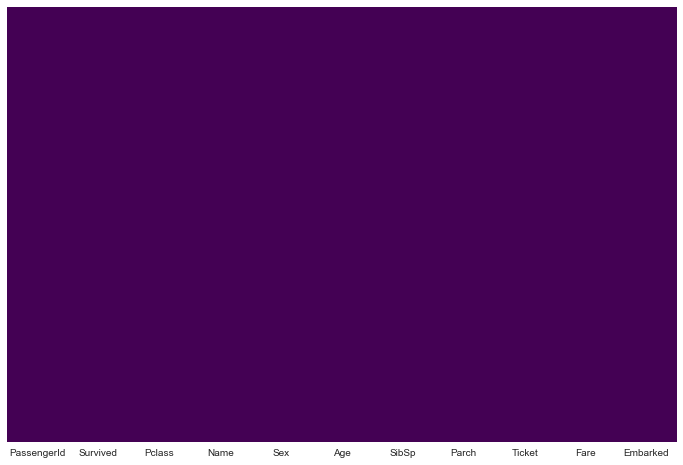

In [68]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) the missing values
sns.heatmap(data=titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Conclusion:
- No missing values in the dataset

### 4.3 Dealing with the Non-numerical features

In [69]:
# List all non-numerical columns
titanic_train.select_dtypes(exclude='number').columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

#### Conclusion:
- **Non-numerical variables (features)** are 'Name', 'Sex', 'Ticket', 'Embarked'

### 1. `Sex` feature

In [70]:
# Show all unique values in the column
titanic_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [71]:
# Create a new column indicating the categorical data (0 or 1)
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)

In [72]:
# Concatination of dummy columns to actual DataFrame
titanic_train = pd.concat([titanic_train, sex], axis=1)

In [73]:
# Drop column (feature) from the table
titanic_train.drop('Sex', axis=1, inplace=True)

In [74]:
# Display the few top rows of a DataFrame
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


### 2. `Embarked` feature

In [75]:
# Show all unique values in the column
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [76]:
# Create a new column indicating the categorical data (0 or 1)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [77]:
# Concatination of dummy columns to actual DataFrame
titanic_train = pd.concat([titanic_train, embark], axis=1)

In [78]:
# Drop column (feature) from the table
titanic_train.drop('Embarked', axis=1, inplace=True)

In [79]:
# Display the few top rows of a DataFrame
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


### 3. `PassengerId`, `Name` and `Ticket` features

In [80]:
# Drop column (feature) from the table
titanic_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

#### Conclusion:
- Drop the 'PassengerId', 'Name', 'Ticket' columns which are of no significance and cannot provide any insight into the dataset
- For 'Name' feature it is possible to create new feature ('Title') extracting from the existing

In [81]:
# Display the few top rows of a DataFrame
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 5. Train and Test the Logistic Regression model

### 5.1 Split the columns

- Separate features columns (X) from target variable (label) column (y)
- Split columns into:
    - X-array contains the features columns that we are going to train (only numerical columns)
    - y-array contains the target variable (label) column (what we try to predict)

In [82]:
# List of the column names
titanic_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [83]:
# X-array
X = titanic_train.drop('Survived',axis=1)

# y-array
y = titanic_train['Survived']

### 5.2 Split the data into Training dataset and Testing dataset

- Training dataset is used to train out the model
- Testing dataset is used to test (evaluate) the model once it is trained
- Split the data into Training dataset and Testing dataset by Tuple unpacking
    - test_size is the percentage of dataset that we want to be allocated to the test size (0.3 = 30%)
    - random_state is specific set of random splits on data
- Split the Titanic dataset (889 observations) into:
    - 70% Training data (622 observations)
    - 30% Testing data (267 observations)

In [84]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [85]:
# Split the data into Training dataset and Testing dataset by Tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [86]:
# Shape of input Training dataset
X_train.shape

(622, 8)

In [87]:
# Shape of output Training dataset
y_train.shape

(622,)

In [88]:
# Shape of input Testing dataset
X_test.shape

(267, 8)

In [89]:
# Shape of output Testing dataset
y_test.shape

(267,)

### 5.3 Create the Logistic Regression model

In [90]:
# Import the 'Logistic Regression' model from family 'linear_model' of Scikit-Learn
from sklearn.linear_model import LogisticRegression

In [91]:
# Instantiate the LogisticRegression() model (Estimator) with parameters
# Create an instance of class LogisticRegression() model (Logistic Regression object)
logmodel = LogisticRegression()

### 5.4 Train / fit the Logistic Regression model

In [92]:
# Train / fit the Logistic Regression model on Training dataset
logmodel.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 5.5 Predictions from the model on Testing data

- Predictions from the model are performed with observations that the model has never seen before
- Observations were previously stored in the Testing dataset (X_test)

In [93]:
# Get the predictions from the model based of the Testing dataset
predictions = logmodel.predict(X_test)

# Check the predicted values
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

### 5.6 Evaluate the model on Testing data

- Provides the score for the Testing data
- Model predicts the class of the data and predicted class is matched with output Testing label to give the Accuracy

#### 5.6.1 Classification report 

- Summarize (evaluate) the performance of the classifier on Testing data
- Basic terminology used in Classification report:								
    - **precision** -> how many times the positive prediction was actually positive (TP / (TP+FP))
	- **recall** -> out of all positive points how many were predicted positive (TP / (TP+FN))
	- **f1-score** -> Harmonic mean of precision and recall ((precision * recall) / (precision + recall))
	- **support** -> quantity per class

In [94]:
# Import the Classification report from Scikit-Learn metrics
from sklearn.metrics import classification_report

In [95]:
# Evaluate the performance of the model on Testing dataset by using Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



##### Conclusion:
- Accuracy of 81% is OK, but not fantastic due to relatively balanced dataset
- True class we should be looking is the one that has lower representation (minority class) and it is class 1
- True notification whether or not the model is doing well is f1-score on class 1
- It's apparent that the classifier is underperforming for class 1 in terms of recall and f1-score, but the precision is good
- For class 0 the classifier is performing very good

#### 5.6.2 Confusion matrix

- Summary of prediction results on a Classification problem
- Use performance metrics to describe (evaluate) the performance of the Classification models on Testing data for which the true values are already known
- Basic terminology used in Confusion Matrix:								
    - **True Positive (TP)** -> reality is yes and predict is yes
	- **False Positive (FP)** -> reality is no and predict is yes (Type 1 error)
	- **False Negative (FN)** -> reality is yes and predict is no (Type 2 error)
	- **True Negative (TN)** -> reality is no and predict is no

            TP | FN
            ___ ___

            FP | TN

In [96]:
# Import the Confusion matrix from Scikit-Learn metrics
from sklearn.metrics import confusion_matrix

In [97]:
# Evaluate the performance of the model on Testing dataset by using Confusion matrix
print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 36  68]]


##### Conclusion:
- TP = 148
- FN = 15
- FP = 36
- TN = 68

#### 5.6.3 Interpreting of Coefficient of the features

- To validate the assumptions and decisions for feature creating and completing goals by calculating the Coefficient of the features in the decision function
    - Positive coefficients increase the log-odds of the response (and thus increase the probability)
    - Negative coefficients decrease the log-odds of the response (and thus decrease the probability)
- Helps to identify the features that have highest weights

In [98]:
# Coefficient of the features in the decision function
coeff_df = pd.DataFrame(titanic_train.columns.delete(0))

# Create the table with two columns
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logmodel.coef_[0])

# Sort the values
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Fare,0.004673
6,Q,-0.013738
1,Age,-0.025933
3,Parch,-0.085458
7,S,-0.169489
2,SibSp,-0.216672
0,Pclass,-0.786529
5,male,-2.322081


##### Conclusion:
- 'Male' is highest negative coefficient, implying as the 'Male' value decreases (male: 1 to female: 0), the probability of Survived = 1 increases the most
- Also, 'Pclass' has negative coefficient and as it increases, the probability of Survived = 1 decreases the most

### 5.7 GridSearchCV

### GridSearchCV
- improve the model by **tuning / adjust the hyper-parameters of an estimator (model)**
- to **find the names and current values for all parameters for a given estimator** use `estimator().get_params()`
- Scikit-learn has **built-in functionality** called **GridSearchCV** (CV stands for Cross-Validation):
    - to find the right parameters to adjust
    - to create a 'grid' of those parameters
    - to try out all the possible combinations
- **GridSearchCV takes a Grid of parameters defined as a Dictionary** that should be tried and to train the model
    - keys - the parameters that should be tried in a model to train
    - values - the list of settings to be tested
- **GridSearchCV is a meta-estimator**, because it **takes an estimator** and **creates a new estimator**, that behaves exactly the same

### GridSearchCV for Logistic Regression:
- **hyper-parameters for Logistic Regression** are C, class_weight, dual, fit_intercept, intercept_scaling, l1_ratio, max_iter, multi_class, n_jobs, penalty='l2', random_state, solver, tol, verbose, warm_start
- **most common arguments** in GridSearchCV for Logistic Regression:
    - **C** - Inverse of regularization strength (test values are 100, 10, 1.0, 0.1, 0.01)
    - **penalty** - Specify the norm used in the penalization (‘none’, ‘l1’, ‘l2’, ‘elasticnet’)
    - **solver** - Algorithm to use in the optimization problem (‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’)
- more information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 5.7.1 Create the Grid of parameters

In [99]:
# Import the GridSearchCV built-in function from Scikit-Learn
from sklearn.model_selection import GridSearchCV

In [100]:
# Find the names and current values for all parameters for the Estimator
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [101]:
# Create a Grid of parameters variable defined as Dictionary
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000], 
              'penalty': ['l1','l2'],
              'solver' : ['liblinear']}

#### 5.7.2 Create the GridSearchCV model (Re-create the Logistic Regression model)

In [102]:
# Create an instance of GridSearchCV() model (GridSearchCV object)
logmodel_cv = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)

#### 5.7.3 Train / fit the GridSearchCV model (Re-train / Re-fit the Logistic Regression model)

In [103]:
# Train / fit the Logistic Regression model on Training dataset
logmodel_cv.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.649, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.611, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.646, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.716, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.630, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.665, total=   0.0s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [104]:
# Get the combination of parameters (best parameter setting) that has the best score
print("Best parameters (tuned hyper-parameters): ", logmodel_cv.best_params_)

Best parameters (tuned hyper-parameters):  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [105]:
# Get the best score
print("Best score: ", logmodel_cv.best_score_)

Best score:  0.792604501607717


In [106]:
# Get the best Estimator_
print("Best Estimator: ", logmodel_cv.best_estimator_)

Best Estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


#### 5.7.4 Predictions from the GridSearchCV model (Re-predictions from the Logistic Regression model) on Testing data

In [107]:
# Get the re-predictions from the model based of the Testing dataset
logmodel_cv_predictions = logmodel_cv.predict(X_test)

# Check the re-predicted values
logmodel_cv_predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

#### 5.7.5 Evaluate the GridSearchCV model (Re-evaluate the Logistic Regression model) on Testing data

#### 1. Classification report 

In [108]:
# Re-evaluate the performance of the model on Testing dataset by using Classification report
print(classification_report(y_test, logmodel_cv_predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



##### Conclusion:
- Accuracy is improved from 81% (before GridSearchCV) to 83% (after GridSearchCV)
- Precision, recall and f1-score metrics are improved for both classes

#### 2. Confusion matrix

In [109]:
# Re-evaluate the performance of the model on Testing dataset by using Confusion matrix
print(confusion_matrix(y_test, logmodel_cv_predictions))

[[150  13]
 [ 32  72]]


##### Conclusion:
- TP = 150
- FN = 13
- FP = 33
- TN = 71